In [1]:
import tensorflow as tf
from utils.architectures import residual_attention_92
from utils.plot import getAccuracyPlot, getLossPlot

In [2]:
cifar10 = tf.keras.datasets.cifar10 #load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data() #load dataset
y_train = tf.keras.utils.to_categorical(y_train, 10) #create one-hot encoding vectors for 10 classes
y_test = tf.keras.utils.to_categorical(y_test, 10) #create one-hot encoding vectors for 10 classes


datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=25,
                                                          width_shift_range=0.25,
                                                          height_shift_range=0.25,
                                                          horizontal_flip=True,
                                                          validation_split=0.2) #Data Augmentation
X_train = X_train.astype('float32') / 255 #Normalization by 255
X_test = X_test.astype('float32') / 255 #Normalization by 255

datagen.fit(X_train)  #Applying Data Augmentation to the training dataset

input_shape = X_train.shape[1:]
output_size = 10

In [11]:
model = residual_attention_56(input_shape=input_shape, output_size=output_size)

In [12]:

model.compile(tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=['accuracy'])

In [13]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=64, subset='training'), validation_data=datagen.flow(X_train, y_train, batch_size=64, subset='validation'),
                    epochs=100)

Epoch 1/100
625/625 [==============================] - 64s 84ms/step - loss: 1.9556 - accuracy: 0.2858 - val_loss: 1.8270 - val_accuracy: 0.3282
Epoch 2/100
625/625 [==============================] - 50s 80ms/step - loss: 1.6647 - accuracy: 0.3867 - val_loss: 2.0970 - val_accuracy: 0.2882
Epoch 3/100
625/625 [==============================] - 50s 80ms/step - loss: 1.5703 - accuracy: 0.4251 - val_loss: 1.7048 - val_accuracy: 0.3865
Epoch 4/100
625/625 [==============================] - 50s 80ms/step - loss: 1.5069 - accuracy: 0.4506 - val_loss: 1.5623 - val_accuracy: 0.4270
Epoch 5/100
625/625 [==============================] - 50s 80ms/step - loss: 1.4592 - accuracy: 0.4649 - val_loss: 1.5479 - val_accuracy: 0.4306
Epoch 6/100
625/625 [==============================] - 50s 80ms/step - loss: 1.4221 - accuracy: 0.4821 - val_loss: 1.5620 - val_accuracy: 0.4374
Epoch 7/100
625/625 [==============================] - 50s 79ms/step - loss: 1.3856 - accuracy: 0.4975 - val_loss: 1.8714 - val_ac

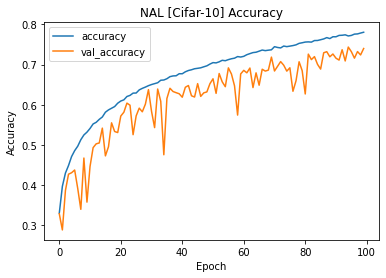

In [14]:
getAccuracyPlot(history, 'NAL [Cifar-10]')

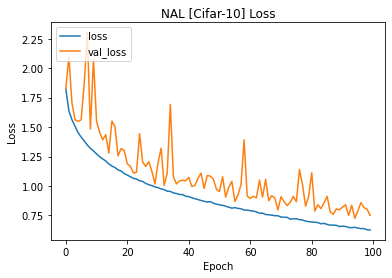

In [15]:
getLossPlot(history, 'NAL [Cifar-10]')

In [16]:
model.save('cifar10_nal_epoch100.h5')

In [3]:
from tensorflow.keras.models import load_model
model = load_model('cifar10_nal_epoch100.h5')
model.evaluate(X_test, y_test)

313/313 [==============================] - 12s 20ms/step - loss: 0.7096 - accuracy: 0.7638


[0.7095582485198975, 0.7638000249862671]